# <b> Evolución de opiniones en grupos de personas influenciadas por medios de comunicación 

En este trabajo, estudiaremos cómo las opiniones de las distintas personas que componen una sociedad evolucionan con el tiempo a medida que interactúan entre ellas. También estudiaremos la influencia de los medios de comunicación en este proceso.   

# Introducción

Cuando dos personas debaten sobre cierto tema, en general, ambos cambian (al menos un poco) su opinión sobre el tema en cuestión ya que la opinión de uno influye en la opinión del otro. Esta influencia puede ser mayor o menor, dependiendo de varios factores: qué tanto poder de convencimiento tenga la persona emisora, qué tan influenciable sea la persona receptora, qué tanta diferencia haya entre la opinión de uno y del otro, entre otros factores. De este modo, en una masa de personas que interactúan entre sí, las opiniones de todos los individuos van a ir variando constantemente, en mayor o menor medida.  
Por otro lado, al estudiar cómo las opiniones de los individuos de una sociedad van variando, debemos tener en cuenta el efecto de los medios de comunicación masivos. Estos emiten opiniones sobre temas que serán recibidas por gran parte de los individuos de la sociedad. También hay que tener en cuenta que algunas personas serán más influenciadas por ciertos medios, y otras por otros. 
En este trabajo, se tratará de estudiar cómo se comportan las opiniones de las personas que integran una sociedad y la influencia de los medios de comunicación masivos, teniendo en cuenta todos los factores anteriormente mencionados. Haremos varios experimentos alternando las condiciones iniciales de las personas que conforman la población, de la sociedad en general y de los medios de comunicación. 


# El modelo

En este modelo, asumiremos que las interacciones serán dos a dos. Es decir, cada interacción involucrará sólo a un emisor (persona o medio de comunicación) y a una persona receptora. 
Usaremos un parámetro p ∈ [-1,1] para medir la opinión que tenga cada persona sobre el tema a debatir. Valores de p cercanos a 1 ó -1, se corresponden con opiniones muy radicales y extremistas; valores de p cercanos a 0, representarán opiniones menos extremas.  
Al interactuar una persona receptora de opinión p, con un emisor de opinión p* (que podría ser una persona o un medio de comunicación), supondremos que el p de esta persona se modificará al valor p’ de la siguiente manera:  


 $p = \left\{ \begin{array}{lcc}
    \displaystyle Min\left(p^*, p + h(p - p^*)\left(1-\left(\frac{|p-p^*|}{2}\right)^3\right)^3 \right) & si & p^* \geq p \\
    \displaystyle Max\left(p^*, p + h(p - p^*)\left(1-\left(\frac{|p-p^*|}{2}\right)^3\right)^3\right) & si & p^* < p  
\end{array}\right.$ 

  $h = pc*i*tc$

<p align = "center"> <i> Fórmula 1 </i>: fórmula de cálculo de nuevo p  </p>

Donde i ∈ [0 , 1] representa el nivel de influenciabilidad de la persona receptora y pc ∈ [0 , 1] representa el poder de convencimiento que tenga el emisor. Notar que h ≥ 0.  
Observar que la opinión de la persona receptora p, cambiará en la dirección de la opinión del emisor con el que esté interactuando, es decir, en la dirección de p$*$, debido al factor (p – p$*$) que está en el segundo término.  
El factor h se puso para tener en cuenta los efectos de la influenciabilidad de la persona receptora y el poder de convencimiento del emisor. Notar que en los casos extremos donde pc toma valores muy cercanos a 0 (es decir, la persona emisora es muy poco convincente) o donde i toma valores muy cercanos a 0 (es decir, la persona receptora es muy poco influenciable), h será cercano a 0 y por lo tanto el segundo término de la fórmula también, y por lo tanto p’ quedará muy parecido a p (es decir, la opinión de la persona receptora será cambiada muy poco). En el otro caso extremo (pc cercano a 1 y i cercano a 1), el h tomará un valor grande y por ende el p’ cambiará bastante con respecto de p (es decir, la opinión de la persona receptora será cambiada bastante). Notar que si p = p$*$, la opinión p no se alterará.  
El factor <img src = 'tricubica.png' width="90" height="90" /> se puso para tener en cuenta el efecto de que si las personas tuviesen opiniones muy diferentes entre sí (es decir, si p es fuese muy diferente de p*), la influencia que se harían mutuamente esas dos personas, tendería a ser más bien baja.  


En cuanto a los medios de comunicación, asumiremos que todos medios podrían ser oídos por todos los integrantes de la sociedad, pero tendremos en cuenta el hecho de que es mucho más probable que una persona reciba noticias de medios con opiniones afines a las suyas, que noticias de medios con opiniones muy diferentes. Además de esto, tendremos en cuenta que las personas que pasan mucho tiempo prestando atención a los medios, escucharán noticias con mucha más frecuencia que aquellas personas que no. Para tener en cuenta estos dos factores, se decidió que para cada emisión dada por cierto medio, cada persona de la sociedad tenga una probabilidad de escucharla dada por 

$\left(1 - \left(\frac{|P-P^*|}{2} \right)^3\right)^3 * ts$ 

<p align = "center"> <i> Fórmula 2 </i>: fórmula de cálculo dde probabilidad de que una persona escuche una noticia </p>

donde p representa la opinión de la persona receptora, p$*$ la opinión del medio emisor y ts representa el "tiempo sillón" que indicaría cuánto tiempo dedica la persona receptora a oir noticias emitidas por medios. Notar, que cuánto más grande sea la diferencia entre p y p$*$ (o sea cuánto menos afín sea la opinión del medio con respecto a la opinión del receptor), menos será la probabilidad de que esa persona oiga esa noticia; y cuánto menos tiempo sillón (ts) tenga esa persona, también, menos probable será que la oiga.

# Estructura del modelo

Para simular este modelo, usaremos varios modelos atómicos llamados “Persona” que todos juntos conformarán un modelo acoplado llamado “Sociedad”. Por otro lado, habrá N modelos atómicos “Medio de comunicación” que interactuarán con todos los miembros de la sociedad. Además de esto, se incorporará un modelo atómico Generador que se usará para solicitar la información de los p's de cada una de las personas con una frecuencia de tiempo constante. 

<img src = 'topModel1.jpeg' width="1000" height="1000" />

<p align = "center"> <i>Figura 1</i>: Esquema del top model. Se omitieron las conexiones persona-persona para simplificar el gráfico. </p>

El grafo que conecta a las personas en el modelo Sociedad, será definido mediante configuration model.

Si llamamos n al máximo grado de libertad de todos los nodos Persona que componen la sociedad, entonces, tenemos que cada modelo Persona tendrá n + 2 puertos input: n puertos inPort para recibir los p's correspondientes a sus personas conocidas, un puerto inMedios para recibir noticias de los medios de comunicación y un puerto infoRequest para que se pueda solicitar información sobre el p actual de esa persona. Por otro lado, cada persona tendrá n puertos output para emitir información a sus conocidos y un puerto outInfo para poder emitir la información de cuál es el valor de su p actual. 

Los modelos atómicos Medio de comunicación tendrán únicamente un puerto output que se conectará con el puerto inMedios del modelo Sociedad, por el que emitirán distintos comunicados de valor p$*$. Luego, a través de este puerto inMedios de Sociedad, se harán llegar las noticias emitidas por los distintos medios a todas las personas de la sociedad. Dada una noticia emitida por un medio, cada persona de la sociedad podrá oirla o no, según una probabilidad dada por la *fórmula 2*. 

El Generador a través de su puerto out conectado al puerto infoRequest de Sociedad, se usará para solicitar información sobre el estado actual de cada uno de los p's correspondientes a cada una de las personas de la sociedad. El generador emitirá una solicitud de información con una frecuencia de tiempo constante. Esta solicitud llegará a el puerto infoRequest de Sociedad, y luego desde aquí se redireccionará a cada uno de los puertos infoRequest de cada una de las personas de la sociedad. Luego, a través del puerto outInfo de cada persona, se emitirá cuál es el valor del p actual. Esta información será enviada hacia el puerto outInfo de Sociedad correspondiente a la persona en cuestión y de ahí luego se enviará al puerto outInfo del Top Model. Esta información será utilizada para poder hacer posteriores análisis. 

## Especificacion Formal

In [1]:
%%bash -s "$CDPP_TP1"


cat Especificacion_Formal.txt

Persona = < X, S, Y, delta_int, delta_ext, lambda, ta > 

X = {(p,v) | p ∈ IPorts, v ∈ X_p} U {(infoRequest,1)}
con IPorts = {inMedios, inPort1, inPort2, inPort3, inPort4, inPort5} y X_p = {x ∈ IR / -1 <= x <= 1}

Y = {(p,v) | p ∈ OPorts, v ∈ Y_p} U {(outInfo,v) | v ∈ Y_p }
con OPorts = {outPort1, outPort2, outPort3, outPort4, outPort5} e Y_p = {y ∈ IR / -1 <= y <= 1}

S = <esperandoRespuesta, estoyRespondiendo, P, Pguardado, puertoDeConexion> 

delta_ext(s,e,x){
    if(!(this -> estoyRespondiendo)){
        if(esperandoRespuesta && x.port == puertoEsperado){
        P = nuevoP(this->P,this -> influenciabilidad x.msg[PoderConvencimiento]);
        esperandoRespuesta = false;
        holdin(active, this -> tiempoDistribucionExponencial );      
        } else {
        if(!esperandoRespuesta){
            if(x.port <= this -> grado){
                this -> pGuarddo = this-> P;
                this -> p = nuevoP(this->P,this -> influenciabilidad x.msg[PoderConvencimiento]);
            

# Simulación 

Comencemos importando algunas librerías que necesitaremos para hacer la simulación y el posterior análisis de datos.

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

CDPP_TP1 = Path.cwd()
#CDPP_SCRIPTS = CDPP_DIR.joinpath('scripts')
#BASE_BIN = CDPP_SRC.joinpath('bin')

### Simulador CD++

In [58]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1/src
#pwd
#Comentar make clean ante un error
#make clean

make -j4

make -C ../../../src/cd++ cd++ OUT_DIR=/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/examples/sed_tp1-main/src/bin MODEL_FLAGS=-DREGISTER_ATOMICS
make[1]: Entering directory '/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'
make -C /home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics OBJ_DIR=obj SRC_DIR=/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make -C /home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/cell OBJ_DIR=obj SRC_DIR=/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make[2]: Entering directory '/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics'
make -C cpu OBJ_DIR=obj SRC_DIR=/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C queue OBJ_DIR=obj SRC_DIR=/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C qss OBJ_DIR=obj

/usr/bin/ld: /home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/examples/sed_tp1-main/src/bin/libsimu.a(macroexp.o): in function `macroExpansion::expand[abi:cxx11]()':
/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/macroexp.cpp:147: warning: the use of `tmpnam' is dangerous, better use `mkstemp'
/usr/bin/ld: warped/notime/obj/DebugStream.o: in function `DebugStream::interact()':
/home/camilaguibaudo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime/DebugStream.cpp:682: warning: the `gets' function is dangerous and should not be used.


## Testing

En la carpeta tests/atomico_persona se encuentran los tests realizados para el modelo atomico Persona. Cada test está compuesto de un modelo acoplado con el Top con las conexiones pertinentes a cada test, y un archivo .ev que contiene los eventos necesarios para llevar a cabo el test. En el test 01, enviamos un mensaje a persona por el puerto inPort1, y luego pedimos su estado a través del puerto infoRequest, para ver que este se afecte según la fórmula antes mencionada.

En el test medio negativo , verificamos que el atomico medio emita en intervalos constantes de tiempo un numero correspondiente a su postura, en este caso va en contra de la opinion, es decir opinion negativa, por lo tanto $-1 \leq P \leq 0$

En el test medio neutral , verificamos que el atomico medio emita en intervalos constantes de tiempo un numero correspondiente a su postura, en este caso la opinion es imparcial, es decir opinion tanto negativa como positiva, por lo tanto $-1 \leq P \leq 1$

En el test medio positivo , verificamos que el atomico medio emita en intervalos constantes de tiempo un numero correspondiente a su postura, en este caso va a favor de la opinion, es decir opinion positiva, por lo tanto $0 \leq P \leq 1$

En el test 02, verificamos que el atómico responda por el puerto correcto, cuando le entre un mensaje de entrada correspondiente a otro atóimico persona.

En el test 03, verificamos que el atómico persona procese con gran probabilidad mensajes de medios con un p cercano al suyo.

En el test 04, verificamos que un atómico persona con tiempo sillon = 0, no vea mensajes de atómicos medio.

En el test 05, verificamos que la probabilidad de que el atómico procese el mensaje de un atómico medio con un p distante al propio, sea baja.

Por último, en el test 06, verificamos que se respete la distribución exponencial con la que el atómico medio inicia una conversación.

## Simulación del modelo con CD++

Armamos un código para poder generar archivos model.ma según los distintos parámetros que elijamos poner en los distintos experimentos

In [4]:
import networkx as nx
import numpy as np
def generarMA(n, maxG, ps, infs, pcs, tss, grados, pms, nroMedios, psMedios,
              periodos_emision, pcMedios, periodo_info=36000, file="model.ma"):
    
    grados[grados>maxG] = maxG
    if(grados.sum() % 2 != 0):
        if(grados[0] < maxG):
            grados[0] = grados[0]+1
        else:
            grados[0] = grados[0]-1
            
    ps[ps>1] = 1
    ps[ps<-1] = -1

    infs[infs>1] = 1
    infs[infs<0] = 0
    
    pcs[pcs>1] = 1
    pcs[pcs<0] = 0

    tss[infs>1] = 1
    tss[infs<0] = 0
    
    pms[pms<0] = 0    
    
    
    f = open(CDPP_TP1.joinpath("model/"+file),'w')
    f.write("[Top]\n")
    f.write("components : Sociedad\n")
    f.write("components : generador@Generator\n")
    for i in range(0,nroMedios):
        f.write("components : Medio"+str(i)+"@Medio\n")
    
    #f.write("in: infoRequest\n")

    for i in range(0,n):
        f.write("out : info_out"+str(i)+"\n")
    
    #f.write("Link : infoRequest infoRequest@Sociedad\n")
    f.write("Link : out@generador infoRequest@Sociedad\n")
    for i in range(0,n):
        f.write("Link : info_out"+str(i)+"@Sociedad info_out"+str(i)+"\n")
        
    for i in range(0,nroMedios): 
        f.write("Link : out@Medio"+str(i)+" inMedios@Sociedad\n")

    f.write("\n[Sociedad]\n")
    for i in range(0,n):
        f.write("components: Persona"+str(i)+"@Persona\n")
    for i in range(0,n):
        f.write("out : info_out"+str(i)+"\n")

    f.write("in : infoRequest\n")
    f.write("in : inMedios\n")
        
    for i in range(0,n):
        f.write("Link : outInfo@Persona"+str(i)+" info_out"+str(i)+"\n")
        f.write("Link : infoRequest infoRequest@Persona"+str(i)+"\n")
        f.write("Link : inMedios inMedios@Persona"+str(i)+"\n")

    conf_model = nx.configuration_model(grados)
    conf_model = nx.Graph(conf_model)
    conf_model.remove_edges_from(nx.selfloop_edges(conf_model))

    puerto_mas_alto = dict.fromkeys(range(0,n),1)

    for node in range(0,n):

        neighborhood = nx.all_neighbors(conf_model, node)
        degree = nx.degree(conf_model, node)
        nombre = "@Persona"+str(node)

        for neighbor in neighborhood:
            if neighbor > node:
                port = puerto_mas_alto[node]
                puerto_mas_alto[node] += 1

                out_port = "outPort"+str(port)
                in_port = "inPort"+str(port)

                port_neighbor = puerto_mas_alto[neighbor]
                puerto_mas_alto[neighbor] += 1

                nombre_vecino = "@Persona"+str(neighbor)
                out_port_neighbor = "outPort"+str(port_neighbor)
                in_port_neighbor = "inPort"+str(port_neighbor)

                f.write("Link : "+out_port+nombre+" "+in_port_neighbor+nombre_vecino+"\n")
                f.write("Link : "+out_port_neighbor+nombre_vecino+" "+in_port+nombre+"\n")

    for i in range(0,n):
        f.write("\n[Persona"+str(i)+"]\n")
        f.write("p : "+str(ps[i])+"\n")
        f.write("influenciabilidad : "+str(infs[i])+"\n")
        f.write("poder_convencimiento : "+str(pcs[i])+"\n")
        f.write("tiempo_sillon : "+str(tss[i])+"\n")
        f.write("periodo_medio : "+str(pms[i])+"\n")
        f.write("grado : "+str(nx.degree(conf_model, i))+"\n")
        
    for i in range(0,nroMedios):
        f.write("\n[Medio"+str(i)+"]\n")
        f.write("P : "+str(psMedios[i])+"\n")
        f.write("Periodo_de_emision : "+str(periodos_emision[i])+"\n")
        f.write("Poder_de_convencimiento : "+str(pcMedios[i])+"\n")
    
    f.write("\n[generador]\n")
    f.write("distribution : constant\n")
    f.write("value : "+str(periodo_info)+"\n")
    f.write("init : 1\n")
    f.write("increment : 0\n")

    f.close()
    return conf_model

# Experimentos

En esta sección usaremos el modelo creado para experimentar vía simulación, cómo evolucionan las opiniones de los distintos integrantes de sociedades a lo largo del tiempo. Setearemos distintas condiciones iniciales en cada experimento, para analizar diferentes posibles escenarios. 

Importemos primero unas librerías que necesitaremos para graficar y definamos algunas funciones:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats


# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'person'
VALUE_COL = 'p'

# conversion a float
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df



## Experimento 1: Sociedad heterogénea (uniforme) / sin medios de comunicación

In [10]:
n = 1000

nroMedios = 0

medias = np.append(np.full(int(n/2), 0.7), np.full(int(n/2), -0.7))
stds = np.full(n, 0.1)

ps = np.random.uniform(-1,1,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0.2,0.05,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, nroMedios, psMedios = [-1,1],
                  periodos_emision = [], pcMedios = [], file="socHeteroSinMedios.ma")

In [11]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/socHeteroSinMedios.ma \
        -o ./out/socHeteroSinMedios.out\
        -t 2400:00:00:00

Process is interrupted.


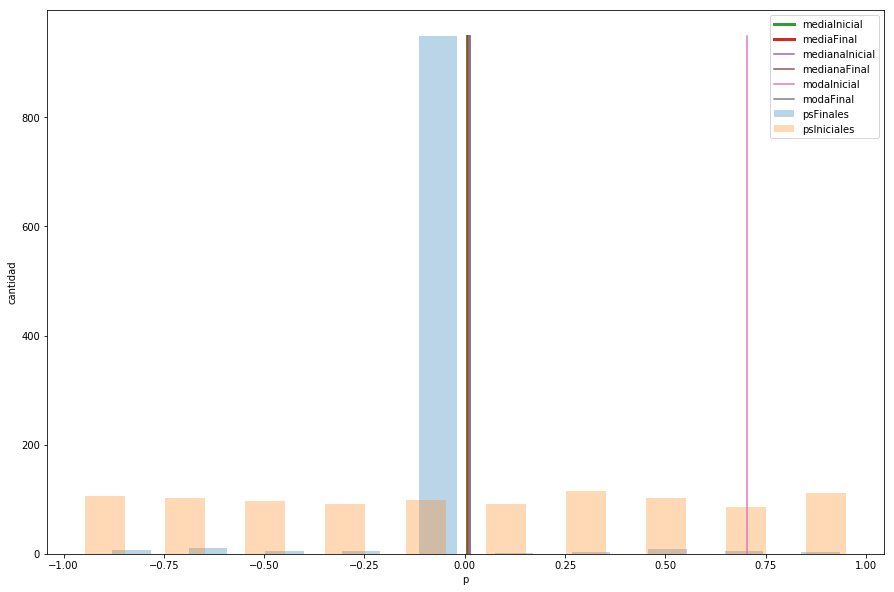

Moda inicial: [0.70436]
Media inicial: 0.005794219999999995
Mediana inicial: 0.009415
Moda final: [0.01377]
Media final: 0.008433810000000017
Mediana final: 0.01375


In [37]:
# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/socHeteroSinMedios.out"

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']


# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5) 

# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Observamos que las opiniones tienden a homogeneizarse alrededor de p = 0. 

## Experimento 2: Sociedad heterogénea (uniforme) / medios polarizados

In [14]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 2, psMedios = [-0.8,0.8],
                  periodos_emision = [6,6], pcMedios = [0.5,0.5], file="socHeteroMediosPol.ma")

In [29]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/socHeteroMediosPol.ma \
        -o ./out/socHeteroMediosPol.out\
        -t 2400:00:00:00

Process is interrupted.


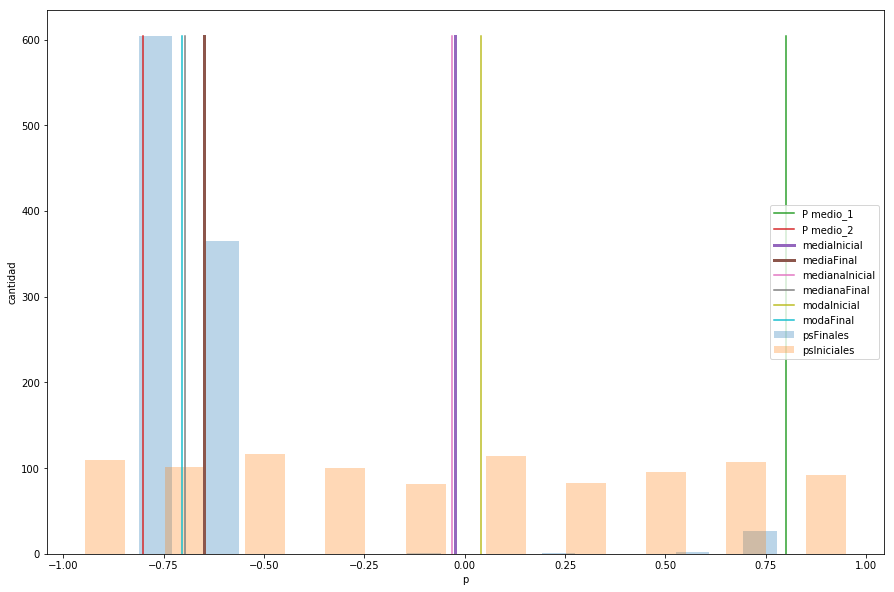

Moda inicial: [0.03971]
Media inicial: -0.024503790000000008
Mediana inicial: -0.032055
Moda final: [-0.70407]
Media final: -0.6504317499999995
Mediana final: -0.69659


In [38]:
# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/socHeteroMediosPol.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']


# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)

# PLOT P DE LOS MEDIOS manopla
plt.plot([0.8,0.8],[0,max(histo[0])],label='P medio_1')
plt.plot([-0.8,-0.8],[0,max(histo[0])],label='P medio_2')

# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Se observa que las opiniones se comenzaron a segregar: una parte de ellas alrededor del p de uno de los medios, y otra parte de ellas alrededor del p del otro medio. Es llamativo el hecho de que la mayoría de los p's se tendieron acumular alrededor del p de uno de los dos medios. 

## Experimento 3: Sociedad heterogénea (uniforme) / medios heterogéneos 

In [16]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 5, psMedios = [0,-0.5,0.5,-0.9,0.9],
                  periodos_emision = [6,6,6,6,6], pcMedios = [0.5,0.5,0.5,0.5,0.5], file="socHeteroMediosHetero.ma")

In [17]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/socHeteroMediosHetero.ma \
        -o ./out/socHeteroMediosHetero.out\
        -t 2400:00:00:00

Process is interrupted.


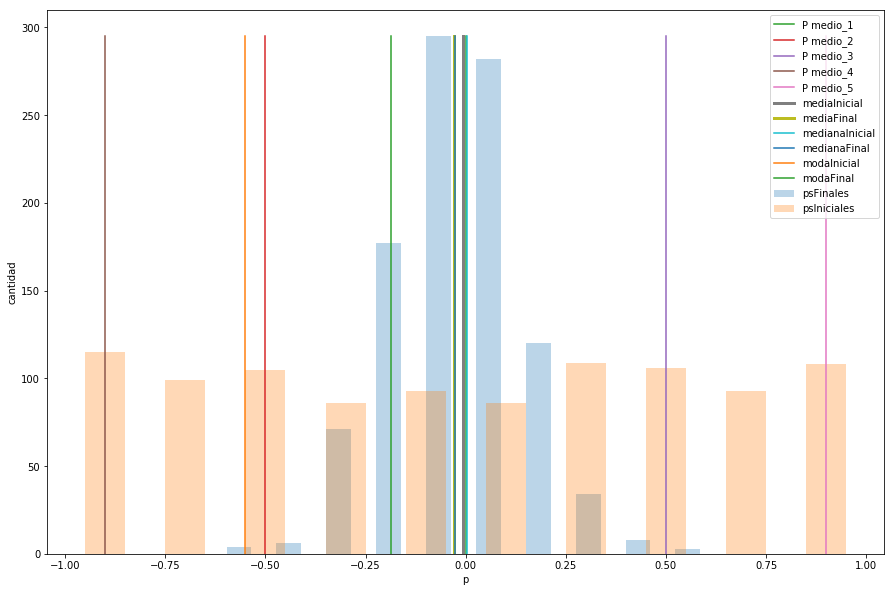

Moda inicial: [-0.55104]
Media inicial: -0.006327809999999999
Mediana inicial: 0.004395
Moda final: [-0.18532]
Media final: -0.028126929999999984
Mediana final: -0.026994999999999998


In [39]:
# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/socHeteroMediosHetero.out"

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5) 

# PLOT P DE LOS MEDIOS manopla
plt.plot([0,0],[0,max(histo[0])],label='P medio_1')
plt.plot([-0.5,-0.5],[0,max(histo[0])],label='P medio_2')
plt.plot([0.5,0.5],[0,max(histo[0])],label='P medio_3')
plt.plot([-0.9,-0.9],[0,max(histo[0])],label='P medio_4')
plt.plot([0.9,0.9],[0,max(histo[0])],label='P medio_5')

# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Las opiniones se empezaron a homogeneizar alrededor de p = 0; tal como pasaba en el caso de sociedad heterogénea sin medios. 

## Experimento 4: Sociedad heterogénea / medio homogéneo neutral 

In [19]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0.0001],
                  periodos_emision = [6], pcMedios = [0.5], file="socHeteroMedioHomo.ma")

In [ ]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/socHeteroMedioHomo.ma \
        -o ./out/socHeteroMedioHomo.out\
        -t 2400:00:00:00

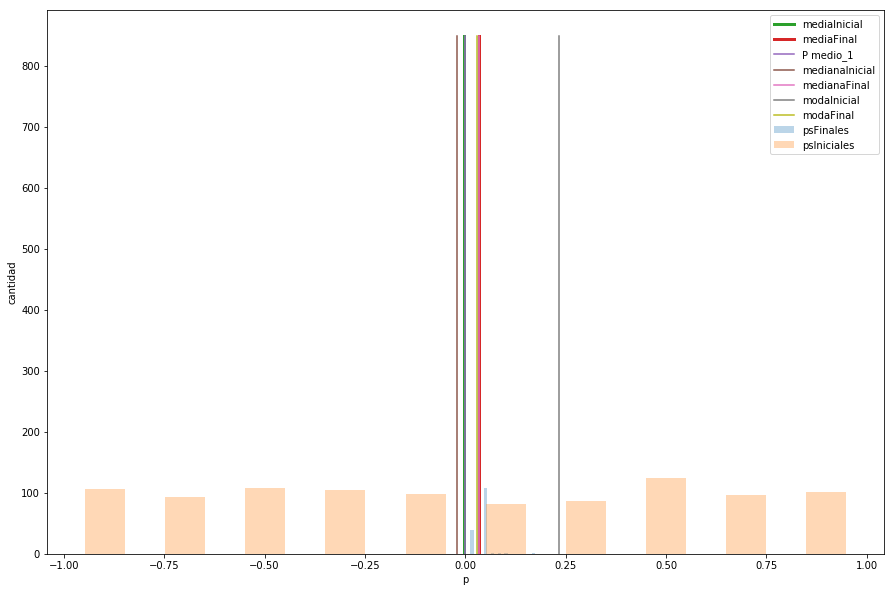

Moda inicial: [0.23272]
Media inicial: -0.0038296600000000047
Mediana inicial: -0.019755
Moda final: [0.02823]
Media final: 0.03513347
Mediana final: 0.0345


In [40]:
# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/socHeteroMedioHomo.out"

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   

# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0.0001,0.0001],[0,max(histo[0])],label='P medio_1')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Las opiniones tendieron a acumularse alrededor del p del único medio presente que es p = 0. 

## Experimento 5: Sociedad heterogénea / medio homogéneo extremista

In [21]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0.8],
                  periodos_emision = [6], pcMedios = [0.5], file="socHeteroMedioHomoExtremista.ma")

In [9]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/socHeteroMedioHomoExtremista.ma \
        -o ./out/socHeteroMedioHomoExtremista.out\
        -t 2400:00:00:00

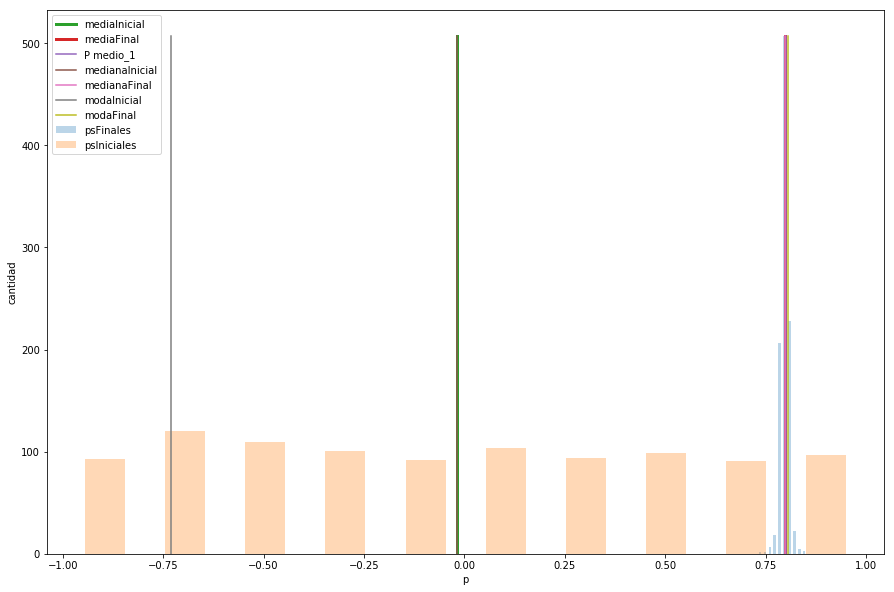

Moda inicial: [-0.73012]
Media inicial: -0.018704060000000012
Mediana inicial: -0.01818
Moda final: [0.80555]
Media final: 0.797227749999999
Mediana final: 0.7971


In [67]:
# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/socHeteroMedioHomoExtremista.out"

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   

# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0.8,0.8],[0,max(histo[0])],label='P medio_1')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Nuevamente las opiniones se homogeneizaron centrándose alrededor del p del único medio de comunicación presente. 

## Experimento 6: Sociedad homogenea neutral / medios de comunicación polarizados¶

In [6]:
n = 1000

nroMedios = 2

#medias = np.append(np.full(int(n/2), 0.7), np.full(int(n/2), -0.7))
#stds = np.full(n, 0.1)

ps = np.random.normal(0.0,0.1,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0,0.1,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(36000,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, nroMedios, psMedios = [-0.8,0.8],
                  periodos_emision = [6,6], pcMedios = [-0.5,0.5], file="expSocMedPolar.ma")

In [27]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/expSocMedPolar.ma \
        -o ./out/expSocMedPolar.out\
        -t 2400:00:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from ./model/expSocMedPolar.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: 
Output to: ./out/expSocMedPolar.out
Tolerance set to: 1e-08
Configuration to show real numbers: Width = 12

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



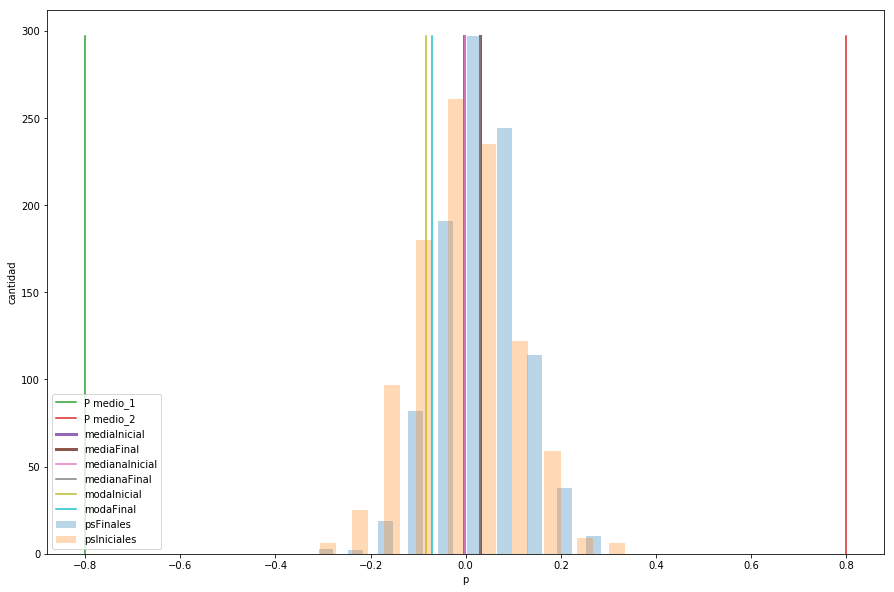

Moda inicial: [-0.08361]
Media inicial: -0.0032746400000000027
Mediana inicial: -0.001045
Moda final: [-0.07032]
Media final: 0.030932139999999986
Mediana final: 0.03018


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/expSocMedPolar.out"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'person'
VALUE_COL = 'p'

# conversion a float
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)  

# PLOT P DE LOSMEDIOS manopla
plt.plot([-0.8,-0.8],[0,max(histo[0])],label='P medio_1')
plt.plot([0.8,0.8],[0,max(histo[0])],label='P medio_2')


# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')



# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Las opiniones que desde un principio estaban centradas alrededor de p = 0, continuaron homogeneizadas alrededor de p = 0. Se observa un pequeño desplazamiento del pico de la curva de Gauss hacia la derecha. 
Observamos que el peso del "boca en boca" de la sociedad fue "más fuerte" que el peso de la influencia de los medios. 

## Experimento 7 : Sociedad homogénea neutral /  medios de comunicación heterogeneos 

In [33]:
n = 1000

nroMedios = 5

#medias = np.append(np.full(int(n/2), 0.7), np.full(int(n/2), -0.7))
#stds = np.full(n, 0.1)

ps = np.random.normal(0.0,0.1,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0,0.1,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(36000,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, nroMedios, psMedios = [-0.9,-0.45, 0, 0.5,0.9],
                  periodos_emision = [6,6,6,6,6], pcMedios = [0.5,0.5,0.5,0.5,0.5], file="expSocHomoMedHetero.ma")

In [ ]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/expSocHomoMedHetero.ma \
        -o ./out/expSocHomoMedHetero.out\
        -t 2400:00:00:00

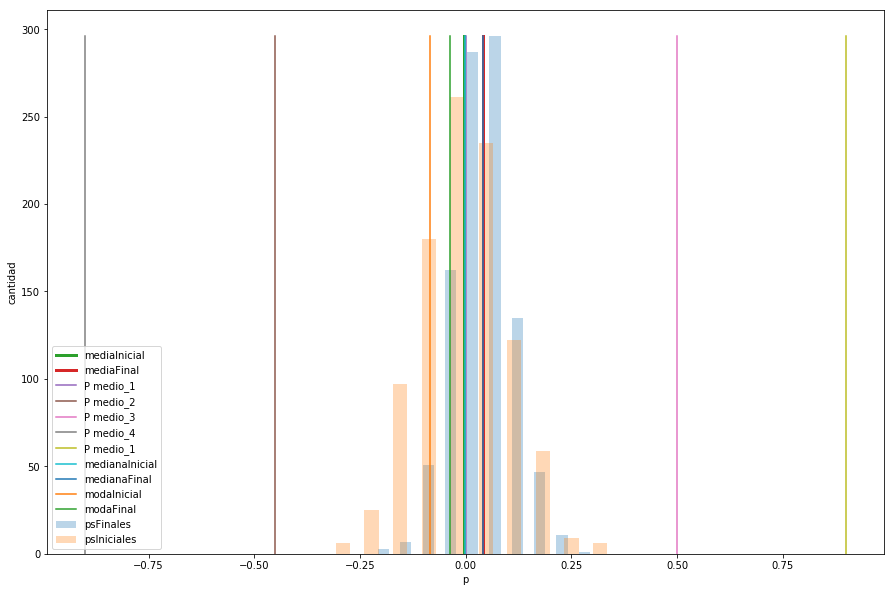

Moda inicial: [-0.08361]
Media inicial: -0.0032746400000000027
Mediana inicial: -0.001045
Moda final: [-0.03615]
Media final: 0.04115813000000006
Mediana final: 0.041510000000000005


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/expSocHomoMedHetero.out"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'person'
VALUE_COL = 'p'

# conversion a float
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0,0],[0,max(histo[0])],label='P medio_1')
plt.plot([-0.45,-0.45],[0,max(histo[0])],label='P medio_2')
plt.plot([0.5,0.5],[0,max(histo[0])],label='P medio_3')
plt.plot([-0.9,-0.9],[0,max(histo[0])],label='P medio_4')
plt.plot([0.9,0.9],[0,max(histo[0])],label='P medio_1')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Nuevamente la sociedad siguió centrada con apenas un pequeño desplazamiento hacia la derecha.

## Experimento 8 : Sociedad homogénea neutral / sin medios de comunicación 

In [36]:
n = 1000

nroMedios = 0

#medias = np.append(np.full(int(n/2), 0.7), np.full(int(n/2), -0.7))
#stds = np.full(n, 0.1)

ps = np.random.normal(0.0,0.1,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0,0.1,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(36000,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, nroMedios, psMedios = [0,0],
                  periodos_emision = [6,6], pcMedios = [0.5,0.5], file="expSocHomoSinMedios.ma")

In [ ]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/expSocHomoSinMedios.ma \
        -o ./out/expSocHomoSinMedios.out\
        -t 2400:00:00:00

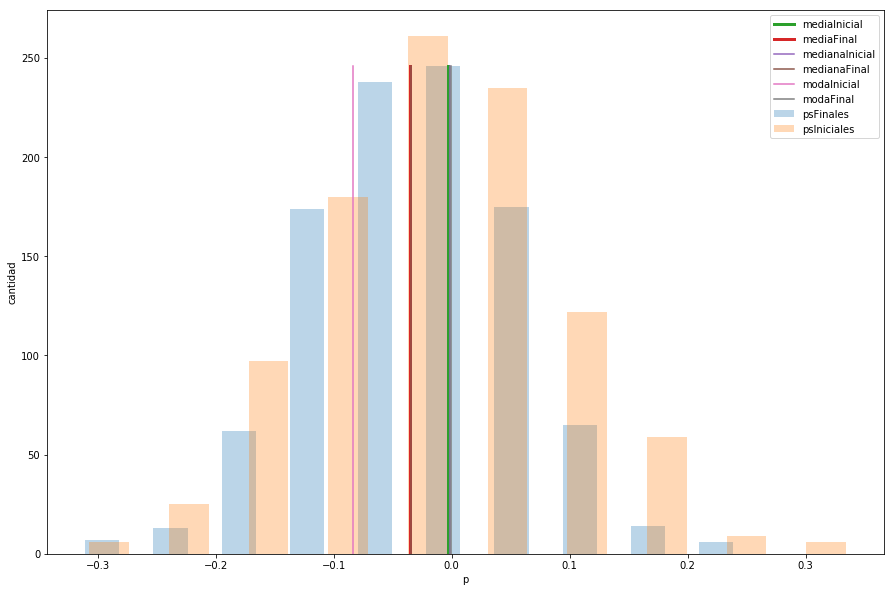

Moda inicial: [-0.08361]
Media inicial: -0.0032746400000000027
Mediana inicial: -0.001045
Moda final: [-0.00039]
Media final: -0.035241280000000035
Mediana final: -0.03472


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/expSocHomoSinMedios.out"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'person'
VALUE_COL = 'p'

# conversion a float
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

La sociedad continuó estando centrada alrededor de p = 0. 

## Experimento 9 : Sociedad homogénea neutral / Un medio de comunicación extremista

In [41]:
n = 1000

nroMedios = 1

#medias = np.append(np.full(int(n/2), 0.7), np.full(int(n/2), -0.7))
#stds = np.full(n, 0.1)

ps = np.random.normal(0.0,0.1,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0,0.1,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(36000,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, nroMedios, psMedios = [-0.8],
                  periodos_emision = [6], pcMedios = [0.5], file="expSocHomoUnMedioHomogeneoExtremista.ma")

In [ ]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/expSocHomoUnMedioHomogeneoExtremista.ma\
        -o ./out/expSocHomoUnMedioHomogeneoExtremista.out\
        -t 2400:00:00:00

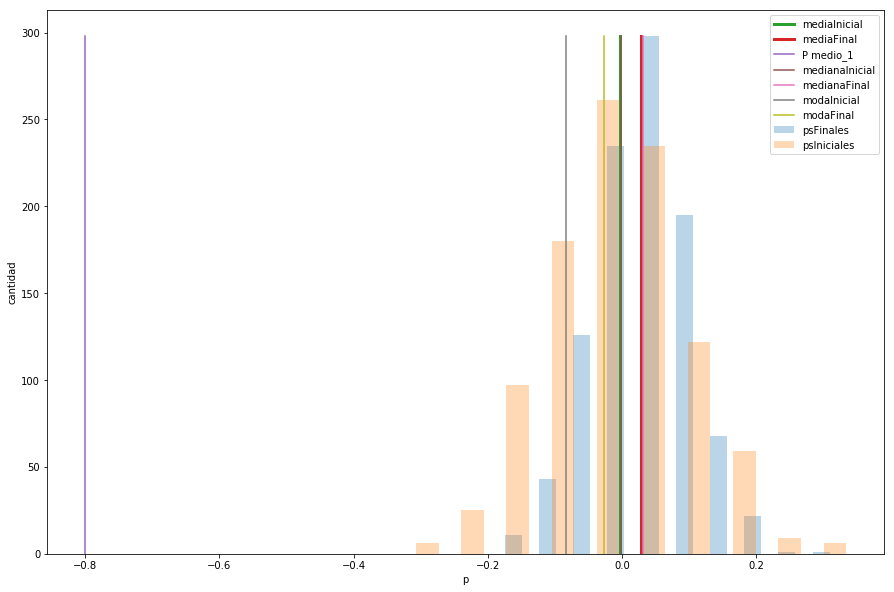

Moda inicial: [-0.08361]
Media inicial: -0.0032746400000000027
Mediana inicial: -0.001045
Moda final: [-0.02661]
Media final: 0.02923570999999998
Mediana final: 0.031365000000000004


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/expSocHomoUnMedioHomogeneoExtremista.out"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'person'
VALUE_COL = 'p'

# conversion a float
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_secs
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

def meansFromDF(df):
    
    data = df.values
    
    cantHoras = data[:,1].tolist().count('info_out0')
    cantPersonas = data[:,0].tolist().count(0.0)
    
    data = data.reshape((cantHoras, cantPersonas, 3))
    
    tiempos = np.zeros(data.shape[0])
    means = np.zeros(data.shape[0])
    median = np.zeros(data.shape[0])
    mode = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        mode[i] = stats.mode(data[i,:,2])[0]
        median[i] = np.median(data[i,:,2])
        tiempos[i] = data[i,0,0]
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_media', 'P_moda', 'P_mediana'])
    df['Tiempo'] = tiempos
    df['P_media'] = means
    df['P_moda'] = mode
    df['P_mediana'] = median
    
    
    return df

ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([-0.8,-0.8],[0,max(histo[0])],label='P medio_1')


# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Nuevamente las opiniones continuaron estando centradas en p = 0 como lo estaban inicialmente. El medio de comunicación no tuvo una influencia significativa en esta sociedad. 

## Experimento 10: Sociedad polarizada / Sin medios

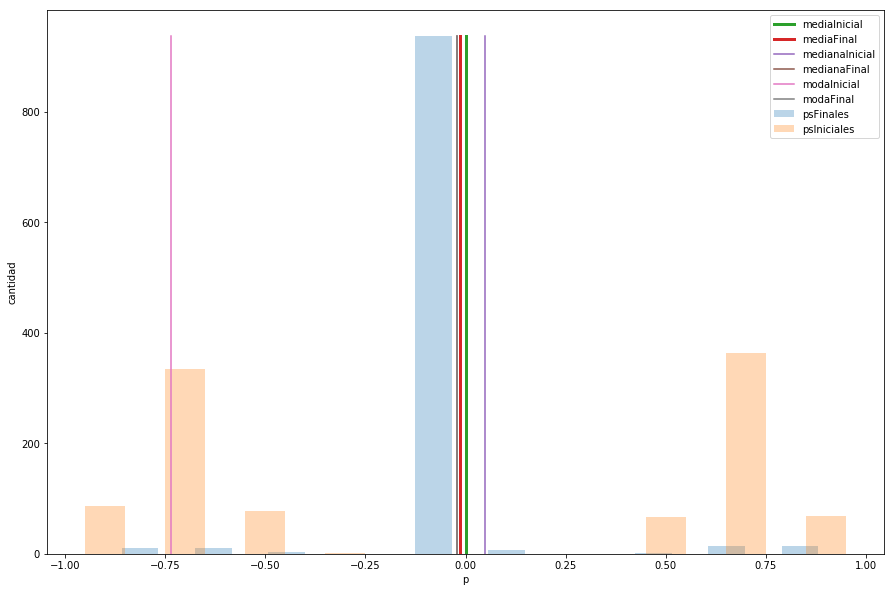

Moda inicial: [-0.73529]
Media inicial: 0.0020014900000004726
Mediana inicial: 0.04901
Moda final: [-0.02153]
Media final: -0.013653410000000013
Mediana final: -0.02143


In [48]:
#Genero los valores para la sociedad polarizada con inf=0.2 y pc=0.2

n = 1000

ps = np.append(np.random.normal(0.7,0.1,int(n/2)),np.random.normal(-0.7,0.1,int(n/2)))
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.2,0.05,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0.2,0.05,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.1,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG = 5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 0, psMedios = [],
                  periodos_emision = [], pcMedios = [], 
                  file="exp_polarizada_sinMedios.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_sinMedios.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')



# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Observamos que esta sociedad polarizada, al pasar el tiempo, se terminó homogeneizando alrededor de p = 0. 

## Experimento 11: Sociedad polarizada / Un medio homogeneo neutral

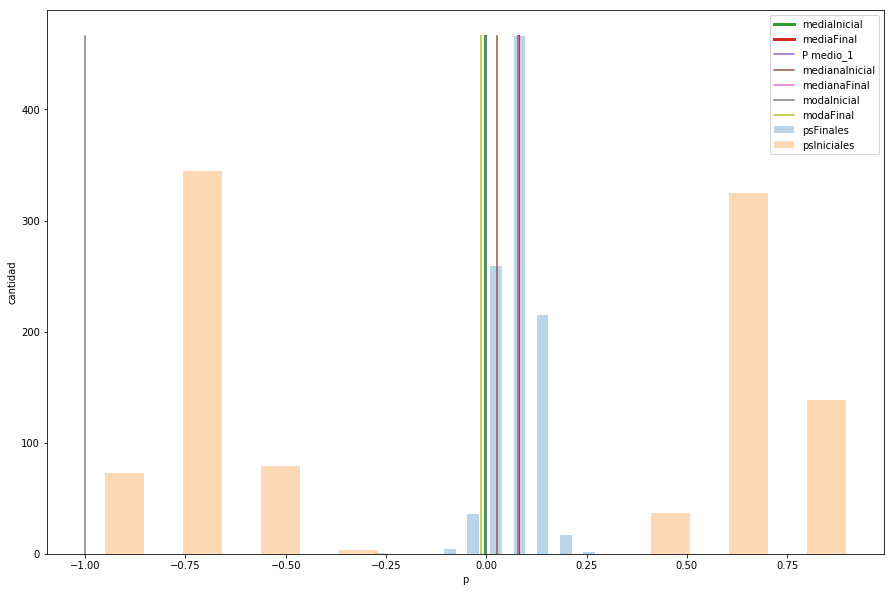

Moda inicial: [-1.]
Media inicial: -0.004007840000000136
Mediana inicial: 0.02769000000000002
Moda final: [-0.01325]
Media final: 0.07868102000000014
Mediana final: 0.080155


In [56]:

#Genero los valores para la sociedad polarizada con inf=0.2 y pc=0.2
grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(3600,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0],
                  periodos_emision = [6], pcMedios = [0.5], 
                  file="exp_polarizada_medioCentrado.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_medioCentrado.out"


salida_inf2 = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida_inf2.loc[salida['time'] == salida['time'].min()]

ps_finales = salida_inf2.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0,0],[0,max(histo[0])],label='P medio_1')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Nuevamente la sociedad polarizada al pasar el tiempo se terminó homogeneizando alrededor de p = 0, posiblemente por dos motivos: uno es que una sociedad polarizada naturalmente tiende a homogeneizarse alrededor de p = 0 según el experimento anterior; y otro es que el único medio presente en esta sociedad influencia a las personas emitiendo noticias justamente con p's cercanos a 0. 

## Experimento 12: Sociedad polarizada / Medios polarizados

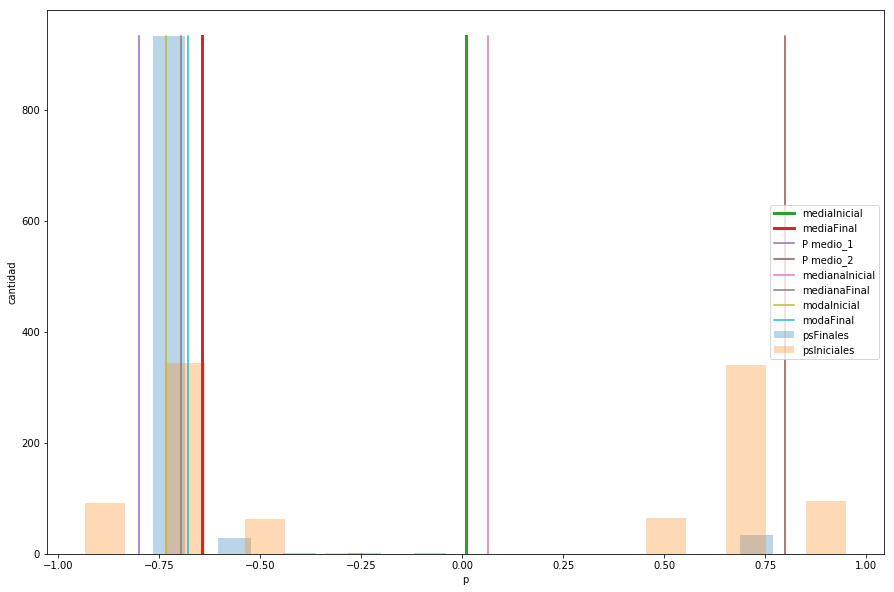

Moda inicial: [-0.73284]
Media inicial: 0.008717519999999628
Mediana inicial: 0.06367
Moda final: [-0.67899]
Media final: -0.6426208799999991
Mediana final: -0.695755


In [50]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 2, psMedios = [-0.8,0.8],
                  periodos_emision = [6,6], pcMedios = [0.5,0.5], 
                  file="exp_polarizada_mediosPolarizados.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_mediosPolarizados.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([-0.8,-0.8],[0,max(histo[0])],label='P medio_1')
plt.plot([0.8,0.8],[0,max(histo[0])],label='P medio_2')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

La sociedad se volvió bastante homogénea extremista, con valores de p centrados en el valor de p de uno de los dos medios de comunicación presentes. 

## Experimento 13: Sociedad polarizada / Medios heterogeneos

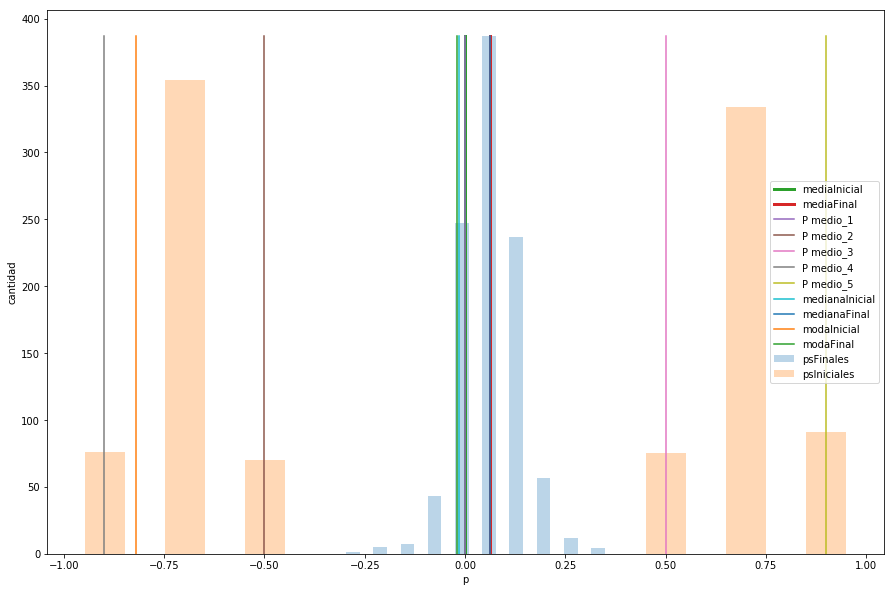

Moda inicial: [-0.81986]
Media inicial: -0.0001794699999998375
Mediana inicial: -0.015770000000000006
Moda final: [-0.02077]
Media final: 0.062031520000000034
Mediana final: 0.06166


In [51]:
graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 5, psMedios = [-0.9, -0.5, 0, 0.5, 0.9],
                  periodos_emision = [6,6,6,6,6], 
                  pcMedios = [0.5,0.5,0.5,0.5,0.5], 
                  file="exp_polarizada_mediosHeterogeneos.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_mediosHeterogeneos.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0,0],[0,max(histo[0])],label='P medio_1')
plt.plot([-0.5,-0.5],[0,max(histo[0])],label='P medio_2')
plt.plot([0.5,0.5],[0,max(histo[0])],label='P medio_3')
plt.plot([-0.9,-0.9],[0,max(histo[0])],label='P medio_4')
plt.plot([0.9,0.9],[0,max(histo[0])],label='P medio_5')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

La sociedad se homogeneizó alrededor de p = 0. Era lo esperable teniendo en cuenta el experimento 10 que mostraba que una sociedad polarizada evolucionaría de forma tal que se terminaría centrando en p = 0, y teniendo en cuenta que los medios de comunicación al ser heterogéneos no influencian hacia ningún lado en particular. 

## Experimento 14: Sociedad polarizada / Medio homogéneo extremista 

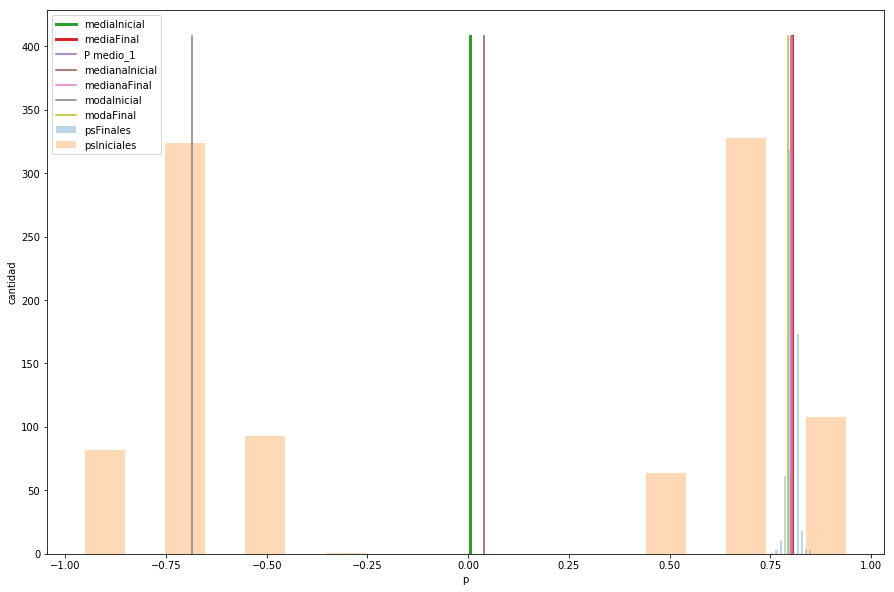

Moda inicial: [-0.68539]
Media inicial: 0.0046529899999998275
Mediana inicial: 0.04025999999999999
Moda final: [0.79399]
Media final: 0.8041911200000003
Mediana final: 0.8040849999999999


In [52]:

graph = generarMA(n, maxG, ps, infs, pcs, tss, 
                  grados, pms, 1, psMedios = [0.8],
                  periodos_emision = [6], pcMedios = [0.5], 
                  file="exp_polarizada_medioExtremista.ma")

#Correr en consola


# definimos los path a los archivos de interés
OUT_FILENAME = str(CDPP_TP1)+"/out/exp_polarizada_medioExtremista.out"


salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )


ps_iniciales = salida.loc[salida['time'] == salida['time'].min()]

ps_finales = salida.loc[salida['time'] == salida['time'].max()]


#data
psIniciales= ps_iniciales['p']
psFinales= ps_finales['p']

# HAGO UN HISTOGRAMA CON UN NUMERO DETERMINADO DE CAJITAS
plt.figure(figsize=(15,10))
plt.ylabel("cantidad")
plt.xlabel("p")
histo = plt.hist(psFinales, label='psFinales', alpha=0.3 , rwidth = 0.5)
plt.hist(psIniciales, label='psIniciales', alpha=0.3, rwidth = 0.5)   



# CALCULO LAS MEDIAS 
mediaInicial=np.mean(psIniciales)
plt.plot([mediaInicial, mediaInicial],[0,np.max(histo[0])],lw=3,label='mediaInicial')
mediaFinal=np.mean(psFinales)
plt.plot([mediaFinal, mediaFinal],[0,np.max(histo[0])],lw=3,label='mediaFinal')

# PLOT P DE LOS MEDIOS manopla
plt.plot([0.8,0.8],[0,max(histo[0])],label='P medio_1')

# CALCULO LAS MEDIANAS
medianaInicial=np.median(psIniciales)
plt.plot([medianaInicial, medianaInicial],[0,np.max(histo[0])],label='medianaInicial')
medianaFinal=np.median(psFinales)
plt.plot([medianaFinal, medianaFinal],[0,np.max(histo[0])],label='medianaFinal')

# CALCULO LAS MODAS
modaInicial=stats.mode(psIniciales)[0]
plt.plot([modaInicial, modaInicial],[0,np.max(histo[0])],label='modaInicial')
modaFinal=stats.mode(psFinales)[0]
plt.plot([modaFinal, modaFinal],[0,np.max(histo[0])],label='modaFinal')

plt.legend()
plt.show()

print("Moda inicial:",modaInicial)
print("Media inicial:",mediaInicial)
print("Mediana inicial:",medianaInicial)
print("Moda final:",modaFinal)
print("Media final:",mediaFinal)
print("Mediana final:",medianaFinal)

Al igual que en todos los experimentos hechos con un medio de comunicación monopólico y extremista, las opiniones tendieron a acumularse alrededor del p de este medio. 